# Read ME  
##  Adam Shirley  
## bsa919adam@gmail.com  
## CPSC 438 Project3  

### This project looks at and examines realestate data from Boston and tries to create a model for the median home value using linear and polynomial regression and the scikit-learn library

### Experiment 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures


data = np.load("boston.npz")
target = data['target']
features = data['features']
bias = np.ones((506, 1))
features = np.concatenate((bias, features),axis = 1)

### Experiment 2

In [2]:
features_train, features_test, target_train, target_test = ms.train_test_split(features, target, test_size  = 0.2, random_state = (2021-3-11)) 

### Experiment 3

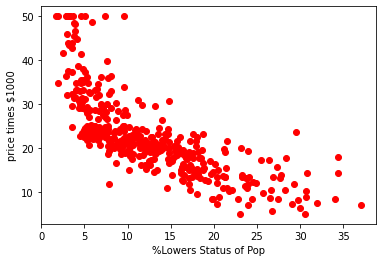

In [3]:
plt.plot(features_train[:,-1], target_train, 'ro')
plt.xlabel("%Lowers Status of Pop")
plt.ylabel("price times $1000")
plt.show()

The relationship does not appear to be linear, instead it appears to be an exponential graph trending torwards 0 

### Experiment 4

In [4]:

lstat_data = np.hstack((np.array([features_train[:,0]]).T , np.array([features_train[:,-1]]).T))
model_linear = lm.LinearRegression(fit_intercept= False).fit(lstat_data, target_train)
print(model_linear.coef_)

[34.99113302 -0.98093888]


the equation is y =  35  - 0.98x

### Experiment 5

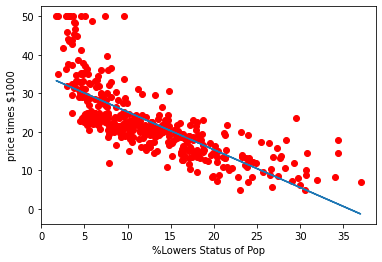

In [5]:
plt.plot(features_train[:,-1], target_train, 'ro')
plt.plot(features_train[:,-1], np.matmul( lstat_data,model_linear.coef_) )

plt.xlabel("%Lowers Status of Pop")
plt.ylabel("price times $1000")
plt.show()

The model fits the plot pretty well through the bulk of the points, but the edges are off on both sides


### Experiment 6

In [6]:

predictions = model_linear.predict(lstat_data)
mse_train = mse(target_train, predictions)
print("training mse = ",mse_train)

training mse =  38.478933448025224


### Experiment 7

In [7]:
lstat_data_test = np.hstack((np.array([features_test[:,0]]).T , np.array([features_test[:,-1]]).T))
predictions = model_linear.predict(lstat_data_test)
mse_test = mse(target_test, predictions)
print("test mse = ",mse_test)
print("difference between test and train mse = ", mse_test - mse_train)

test mse =  38.75054664279498
difference between test and train mse =  0.2716131947697562


The test mse is slightly higher than the training mse

### Experiment 8

In [8]:
lstat_data_poly = np.hstack((lstat_data, np.array([lstat_data[:,-1]]).T ** 2))

model_poly = lm.LinearRegression(fit_intercept= False).fit(lstat_data_poly, target_train)

prediction = model_poly.predict(lstat_data_poly)
mse_train_poly = mse(target_train, prediction)

print("polynomial training mse = ", mse_train_poly)


lstat_test_poly = np.hstack((lstat_data_test, np.array([lstat_data_test[:,-1]]).T ** 2))
prediction = model_poly.predict(lstat_test_poly)
mse_test_poly = mse(target_test, prediction)

print("polynomial test mse = ", mse_test_poly)

print("difference between test and train mse = ", mse_test_poly - mse_train_poly)

polynomial training mse =  30.59851434937097
polynomial test mse =  29.297124138279106
difference between test and train mse =  -1.3013902110918636


The training and Test mses are lower than in the previous linear model. Weirdly though the test ends up being lower than the training probably due to the specific data points that were selected

### Experiment 9

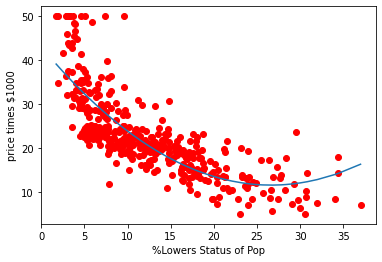

In [9]:
plt.plot(features_train[:,-1], target_train, 'ro')
yvals =  np.matmul( lstat_data_poly ,model_poly.coef_)
indexs = np.argsort(features_train[:, -1])

plt.plot(features_train[:,-1][indexs],yvals[indexs] )


plt.xlabel("%Lowers Status of Pop")
plt.ylabel("price times $1000")
plt.show()

### Experiment 10

In [10]:
model_linear_all = lm.LinearRegression(fit_intercept= False).fit(features_train, target_train)
print(model_linear_all.coef_)

[ 3.43372785e+01 -1.19721961e-01  5.29635924e-02  5.16150347e-02
  2.55847703e+00 -1.72524020e+01  4.08697043e+00 -4.64415129e-03
 -1.52421308e+00  2.99638323e-01 -1.37152390e-02 -8.48912621e-01
  6.56971068e-03 -5.33276034e-01]


$ y = 34.33 - 0.12x_1 +0.053x_2 + 0.0516x_3 + 2.56x_4 - 17.25x_5 + 4.09x_6 - 0.00464x_7 -1.52x_8 + 0.3x_9 - 0.0137x_{10} - 0.849x_{11} + 0.000657x_{12} - 0.533x_{13} $ 

In [11]:
predictions = model_linear_all.predict(features_train)
mse_train_all = mse(target_train, predictions)
print("training mse = ",mse_train_all)

predictions = model_linear_all.predict(features_test)
mse_test_all = mse(target_test, predictions)
print("test mse = ",mse_test_all)
print("difference between test and train mse = ", mse_test_all - mse_train_all)

training mse =  21.04634080534237
test mse =  25.976408935996567
difference between test and train mse =  4.930068130654195


The test MSE is the higher of the two as expected.  
In comparision to the polynomial model this model fits the data better.  
The difference is probably because the extra features adds in more data that is relevant and helps to better represent the data.

### Experiment 11

In [12]:
features_train_poly = np.hstack((features_train, features_train ** 2))

model_poly_all = lm.LinearRegression(fit_intercept= False).fit(features_train_poly, target_train)

prediction = model_poly_all.predict(features_train_poly)
mse_train_all_poly = mse(target_train, prediction)

print("polynomial training mse = ", mse_train_all_poly)


features_test_poly = np.hstack((features_test, features_test ** 2))
prediction = model_poly_all.predict(features_test_poly)
mse_test_all_poly = mse(target_test, prediction)

print("polynomial test mse = ", mse_test_all_poly)

print("difference between test and train mse = ", mse_test_all_poly - mse_train_all_poly)

polynomial training mse =  13.508100802581978
polynomial test mse =  17.85789610501815
difference between test and train mse =  4.349795302436171


The MSE for the polynomial model based on all 13 features had both the test and training MSE improving over the linear model as such the polynomial model seems to be the better model 

### Experiment 12

In [13]:
poly = PolynomialFeatures(2)
features_train_polyfit = poly.fit_transform(features_train)
features_test_polyfit = poly.fit_transform(features_test)


In [14]:
model_polyfit = lm.LinearRegression(fit_intercept= False).fit(features_train_polyfit, target_train)

prediction = model_polyfit.predict(features_train_polyfit)
mse_train_polyfit = mse(target_train, prediction)

print("polynomial training mse = ", mse_train_polyfit)



prediction = model_polyfit.predict(features_test_polyfit)
mse_test_polyfit = mse(target_test, prediction)

print("polynomial test mse = ", mse_test_polyfit)

print("difference between test and train mse = ", mse_test_polyfit - mse_train_polyfit)

polynomial training mse =  5.406278679292468
polynomial test mse =  15.475873878268647
difference between test and train mse =  10.06959519897618


The new model has a much lower training MSE but at the same time the test MSE did not go down by too much.  
It is possible that we are overfitting based on how much the test vs training MSE went down but it is also possible that based on the improvement on the MSE, because although small is still and improvement this model has better generalization ability thatn the previous one. Any model that becomes more complex than this though is almost assuredly overfitting the training set and will show a sharper rise in the test MSE